Exercise 2: Linear Regression with Gradient Descent

Part A: (Datasets) 
$$Airfare and demand: target − > price$$
$$Wine Quality: target − > quality$$
$$Parkisons Dataset: target − > total UPDRS$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_air = pd.read_fwf('Downloads/datasets/airq402.data', header=None) #Read the required csv file and store it
df_wine = pd.read_csv('Downloads/datasets/winequality-red.csv', sep=";")
df_park = pd.read_csv('Downloads/datasets/parkinsons_updrs.data')

df_air.columns = ["City1","City2","Average Fare","Distance","Average weekly passengers","market leading airline","market share","Average fare","Low price airline","market share","price"]


In [2]:
df_air

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


In [3]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df_park

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


Converting any non-numeric values to numeric values i.e,
using hot-one encoding. Here we use the function get_dummies to create dummy features so as to divide the categorical values to each feature. Then we can represent it in binary format.



In [5]:
df_air_numerical = pd.get_dummies(df_air,columns=["City1","City2","market leading airline","Low price airline"])
df_air_numerical


,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136.16,1104,184.34,33.37,135.82,28.65,118.51,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,83.28,200,232.71,99.57,82.55,99.57,82.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,159.97,814,843.80,46.19,159.65,13.89,159.02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,73.57,174,214.45,99.74,73.44,99.74,73.44,0,0,0,...,0,0,0,0,0,0,0,0,1,0


I have used hot-one encoding to convert all columns with categorical/text values to numerical values. For each column, n number of columns are created depending on the number of target classes of that column(n). This provides a binary representation for that feature. Hence the data frame now has a total of 217 columns

The wine data frame and parkinsons data frame does not have any categorical values, hence no need to do hot one encoding

Droping out the rows with missing values or NA using dropna()

In [6]:
df_air_temp = df_air.dropna()
df_wine_temp1 = df_wine.dropna()
df_park_temp2 = df_park.dropna()

In [7]:
df_air_temp.shape

(1000, 11)

Using pearson correlation we can find the correlation strength btw the features so that we can remove those features which has very less correlation with our target feature.

In [8]:
df_air.corr(method="pearson").head(8)
#Average Fare, Distance, Average fare - these are the columns with the highest correlation given below. Hence we only take them for regression 




,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share,price
Average Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average weekly passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
market share,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
market share,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
price,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


In [9]:
df_wine.corr(method="pearson").head(12)
# fixed acidity, citric acid, sulphates, alcohol
#these are the columns with the highest correlation given below. Hence we only take them for reg

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [10]:
df_park.corr(method="pearson").head(7)
# subject#, motor_UPDRS, age, RPDE, PPE, Shimmer:APQ11 - features with highest correlation to target(total_UPDRS)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849


In [11]:
#Defining new dataframe with the features having the highest correlation
df_new_air = df_air.loc[:, df_air.columns.intersection(['Average Fare','Distance','Average fare','price'])]

print(df_new_air)


     Average Fare  Distance  Average fare   price
0          114.47       528        111.03  111.03
1          122.47       860        123.09  118.94
2          214.42       852        223.98  167.12
3           69.40       288         68.86   68.86
4          158.13       723        161.36  145.42
..            ...       ...           ...     ...
995        136.16      1104        135.82  118.51
996         83.28       200         82.55   82.55
997        159.97       814        159.65  159.02
998         73.57       174         73.44   73.44
999        126.67       859        129.92  121.94

[1000 rows x 4 columns]


In [12]:
df_wine_new = df_wine.loc[:, df_wine.columns.intersection(['fixed acidity', 'citric acid', 'sulphates', 'alcohol','quality'])]

print(df_wine_new)


      fixed acidity  citric acid  sulphates  alcohol  quality
0               7.4         0.00       0.56      9.4        5
1               7.8         0.00       0.68      9.8        5
2               7.8         0.04       0.65      9.8        5
3              11.2         0.56       0.58      9.8        6
4               7.4         0.00       0.56      9.4        5
...             ...          ...        ...      ...      ...
1594            6.2         0.08       0.58     10.5        5
1595            5.9         0.10       0.76     11.2        6
1596            6.3         0.13       0.75     11.0        6
1597            5.9         0.12       0.71     10.2        5
1598            6.0         0.47       0.66     11.0        6

[1599 rows x 5 columns]


In [13]:
df_park_new = df_park.loc[:, df_park.columns.intersection(['subject#', 'motor_UPDRS', 'age', 'RPDE', 'PPE', 'Shimmer:APQ11','total_UPDRS'])]

print(df_park_new)


      subject#  age  motor_UPDRS  total_UPDRS  Shimmer:APQ11     RPDE      PPE
0            1   72       28.199       34.398        0.01662  0.41888  0.16006
1            1   72       28.447       34.894        0.01689  0.43493  0.10810
2            1   72       28.695       35.389        0.01458  0.46222  0.21014
3            1   72       28.905       35.810        0.01963  0.48730  0.33277
4            1   72       29.187       36.375        0.01819  0.47188  0.19361
...        ...  ...          ...          ...            ...      ...      ...
5870        42   61       22.485       33.485        0.01549  0.64215  0.21367
5871        42   61       21.988       32.988        0.01904  0.52598  0.12621
5872        42   61       21.495       32.495        0.01877  0.47792  0.14157
5873        42   61       21.007       32.007        0.01307  0.56865  0.14204
5874        42   61       20.513       31.513        0.01470  0.58608  0.15336

[5875 rows x 7 columns]


In [14]:
#Splitting data frames for testing and training

train_air = df_new_air.sample(frac=0.8) #80% for training, 20% for testing
test_air = df_new_air.drop(train_air.index)
print(train_air.shape)
print(test_air.shape)

y_train_air = np.array(train_air[['price']]) # putting the target feature to y array
x_train_air = np.array(train_air.drop(['price'],axis =1))

y_test_air = np.array(test_air[['price']])
x_test_air = np.array(test_air.drop(['price'],axis =1))

#print(y_train_air)
print(x_train_air)
print(y_test_air.shape)

(800, 4)
(200, 4)
[[  86.02  252.     83.57]
 [ 172.27  950.    184.1 ]
 [ 132.86 1521.    152.91]
 ...
 [ 132.81 1444.    136.78]
 [ 249.06 1365.    261.92]
 [ 169.68 1276.    180.59]]
(200, 1)


Doing the same steps for the other two data sets also

In [15]:
train_wine = df_wine_new.sample(frac=0.8)
test_wine = df_wine_new.drop(train_wine.index)
print(train_wine.shape)
print(test_wine.shape)

y_train_wine = np.array(train_wine[['quality']])
x_train_wine = np.array(train_wine.drop(['quality'],axis =1))

y_test_wine = np.array(test_wine[['quality']])
x_test_wine = np.array(test_wine.drop(['quality'],axis =1))

#print(y_train_air)
print(x_train_wine)

(1279, 5)
(320, 5)
[[10.2   0.37  0.49  9.3 ]
 [ 6.8   0.04  0.6   9.5 ]
 [ 8.1   0.    0.72  9.8 ]
 ...
 [ 7.8   0.19  0.93  9.5 ]
 [ 6.6   0.08  0.72 12.5 ]
 [ 6.5   0.14  0.65  9.8 ]]


In [16]:
train_park = df_park_new.sample(frac=0.8)
test_park = df_park_new.drop(train_park.index)
print(train_park.shape)
print(test_park.shape)

y_train_park = np.array(train_park[['total_UPDRS']])
x_train_park = np.array(train_park.drop(['total_UPDRS'],axis =1))

y_test_park = np.array(test_park[['total_UPDRS']])
x_test_park = np.array(test_park.drop(['total_UPDRS'],axis =1))

#print(y_train_air)
print(x_train_wine)

(4700, 7)
(1175, 7)
[[10.2   0.37  0.49  9.3 ]
 [ 6.8   0.04  0.6   9.5 ]
 [ 8.1   0.    0.72  9.8 ]
 ...
 [ 7.8   0.19  0.93  9.5 ]
 [ 6.6   0.08  0.72 12.5 ]
 [ 6.5   0.14  0.65  9.8 ]]


Part B: Linear Regression with Real-World Data

Function to implement the gradient descent algorithm.

We have ,



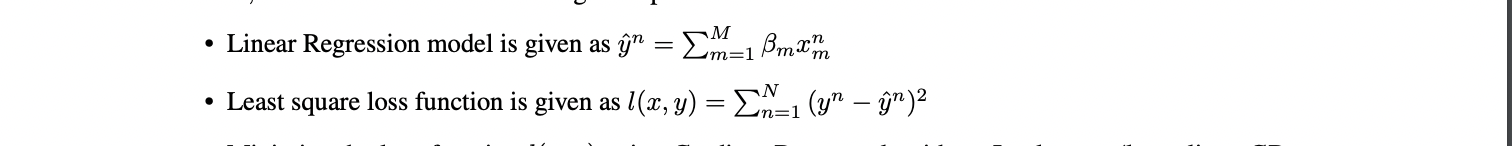

Our objective is to minimize the loss function. 
We find that the gradient of loss function is -
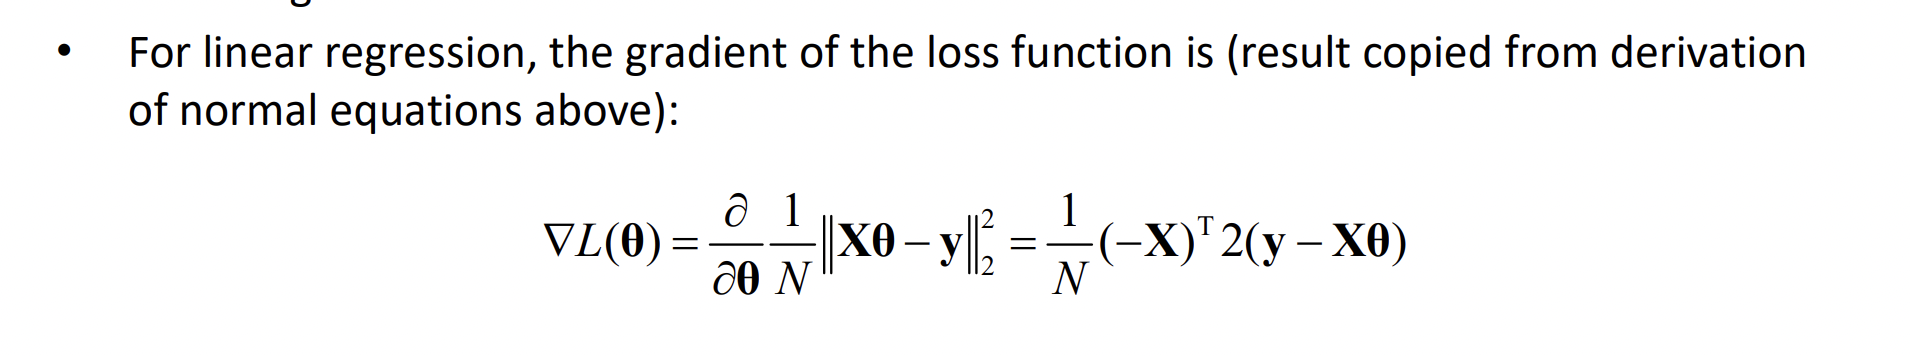

New beta value is determined by the descent direction and steplength

We also find the Absolute Error and the Root Mean square error in each iteration as:
$$Absolute error = abs(f(X-1) - f(x))$$ #prev value - current value
Root mean square error = 
$$ \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{({y_i -ypredicted_i})^2}} $$

In [17]:
def gradientDescent(x_train,y_train,x_test,y_test,alpha,imax):
    
    x = np.hstack((np.ones((len(x_train),1)),x_train))
    x_test1 = np.hstack((np.ones((len(x_test),1)),x_test))
    
    beta = np.zeros(x.shape[1]).reshape(-1,1)
    prev = 0
    li = []
    lj =[]
    for i in range(imax):
        y_predicted = np.dot(x,beta) #finding y from x and beta
        
        
        error_train =  y_train - y_predicted #finding the error btw the predicted target and actual
        
        #To find the absolute diff of the loss function at the current instance and previous instance
        absolute_diff = abs(np.dot(error_train.T,error_train).reshape(-1) - prev)
        li.append(absolute_diff) #appending the same to get values for each iteration
        
        #Finding y_predicted for the test set
        y_predicted_test = np.dot(x_test1,beta)
        error_test = (y_test - y_predicted_test) # Finding root mean square error
        rms = np.sqrt(np.mean(np.dot(error_test.T,error_test)))
        
        lj.append(rms) # appending the rms values for each iteration
        
        #finding the gradient of loss function
        f = np.dot(x.T,error_train) #  multiplying error * x
        gradient = (-2/len(x_train))*f
        
        prev = np.dot(error_train.T,error_train).reshape(-1) #store value of the loss function for finding absolute difference
        
        beta = beta - alpha*gradient #New beta value is determined by the descent direction and steplength
        
    return(li,lj) #returning the errors for each iteration for plotting

Calling gradient descent algorithm for airfare data set with different steplength and iterations and plotting the errors


Steplength-  1e-07


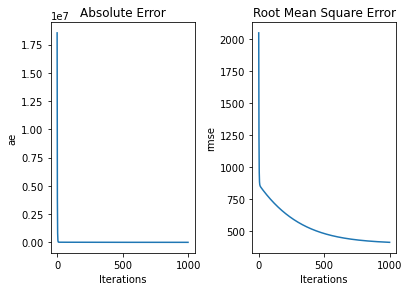

In [18]:
li= []
lj =[]
alpha = 0.0000001
imax = 1000
li,lj= gradientDescent(x_train_air,y_train_air,x_test_air,y_test_air,alpha,imax)
fig,(ax1,ax2)= plt.subplots(1,2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.set_title("Absolute Error")
ax2.set_title("Root Mean Square Error")
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMS")
#print(lj)
#print(li)
print("\nSteplength- ",alpha)


Steplength-  0.002


<ipython-input-17-f6a21a4b83f1>:17: RuntimeWarning: invalid value encountered in subtract
  absolute_diff = abs(np.dot(error_train.T,error_train).reshape(-1) - prev)
<ipython-input-17-f6a21a4b83f1>:33: RuntimeWarning: invalid value encountered in subtract
  beta = beta - alpha*gradient #New beta value is determined by the descent direction and steplength


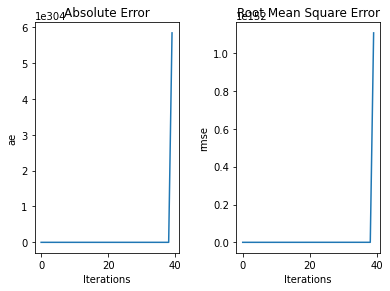

In [19]:
alpha = 0.002 
imax = 300
li,lj= gradientDescent(x_train_air,y_train_air,x_test_air,y_test_air,alpha,imax)
fig,(ax1,ax2)= plt.subplots(1,2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
ax1.set_title("Absolute Error")
ax2.set_title("Root Mean Square Error")
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMS")
print("\nSteplength- ",alpha)

<ipython-input-17-f6a21a4b83f1>:17: RuntimeWarning: invalid value encountered in subtract
  absolute_diff = abs(np.dot(error_train.T,error_train).reshape(-1) - prev)
<ipython-input-17-f6a21a4b83f1>:33: RuntimeWarning: invalid value encountered in subtract
  beta = beta - alpha*gradient #New beta value is determined by the descent direction and steplength



Steplength-  0.02


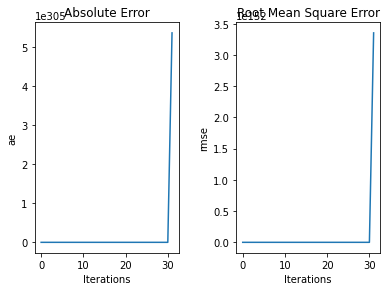

In [20]:
alpha = 0.02
li,lj= gradientDescent(x_train_air,y_train_air,x_test_air,y_test_air,alpha,imax)
fig,(ax1,ax2)= plt.subplots(1,2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
ax1.set_title("Absolute Error")
ax2.set_title("Root Mean Square Error",loc="right")
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMS")
print("\nSteplength- ",alpha)

Calling gradient descent algorithm for wine data set with different steplength and iterations and plotting the errors


Steplength-  1e-05


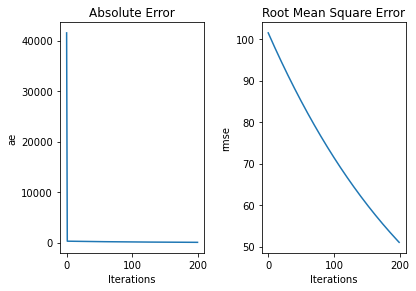

In [21]:
alpha = 0.00001
imax = 200
li,lj= gradientDescent(x_train_wine,y_train_wine,x_test_wine,y_test_wine,alpha,imax)
fig,(ax1,ax2)= plt.subplots(1,2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.set_title("Absolute Error")
ax2.set_title("Root Mean Square Error")
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMS")
print("\nSteplength- ",alpha)


Steplength-  0.001


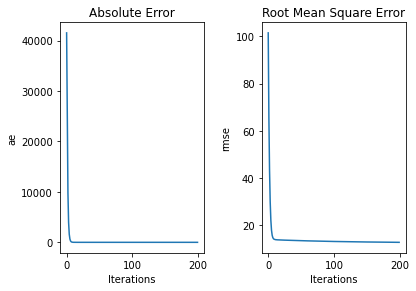

In [22]:
alpha = 0.001
imax = 200
li,lj= gradientDescent(x_train_wine,y_train_wine,x_test_wine,y_test_wine,alpha,imax)
fig,(ax1,ax2)= plt.subplots(1,2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
ax1.set_title("Absolute Error")
ax2.set_title("Root Mean Square Error")
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMS")
print("\nSteplength- ",alpha)


Steplength-  0.02


<ipython-input-17-f6a21a4b83f1>:17: RuntimeWarning: invalid value encountered in subtract
  absolute_diff = abs(np.dot(error_train.T,error_train).reshape(-1) - prev)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2247: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


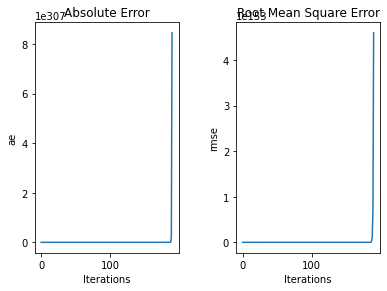

In [23]:
alpha = 0.02
imax = 200
li,lj= gradientDescent(x_train_wine,y_train_wine,x_test_wine,y_test_wine,alpha,imax)
fig,(ax1,ax2)= plt.subplots(1,2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
ax1.set_title("Absolute Error")
ax2.set_title("Root Mean Square Error")
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMS")
print("\nSteplength- ",alpha)

Calling gradient descent algorithm for parkinsond data set with different steplength and iterations and plotting the errors


Steplength-  1e-05


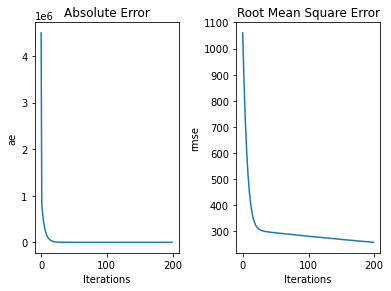

In [24]:
alpha = 0.00001
imax = 200
li,lj= gradientDescent(x_train_park,y_train_park,x_test_park,y_test_park,alpha,imax)
fig,(ax1,ax2)= plt.subplots(1,2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

ax1.set_title("Absolute Error")
ax2.set_title("Root Mean Square Error")
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMS")
print("\nSteplength- ",alpha)


Steplength-  0.001


<ipython-input-17-f6a21a4b83f1>:17: RuntimeWarning: invalid value encountered in subtract
  absolute_diff = abs(np.dot(error_train.T,error_train).reshape(-1) - prev)


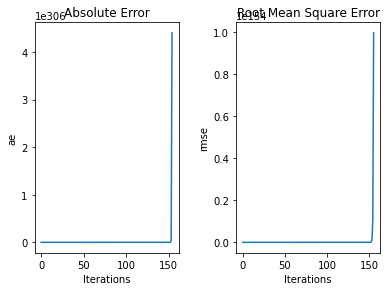

In [25]:
alpha = 0.001
imax = 200
li,lj= gradientDescent(x_train_park,y_train_park,x_test_park,y_test_park,alpha,imax)
fig,(ax1,ax2)= plt.subplots(1,2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
ax1.set_title("Absolute Error")
ax2.set_title("Root Mean Square Error")
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMS")
print("\nSteplength- ",alpha)

<ipython-input-17-f6a21a4b83f1>:17: RuntimeWarning: invalid value encountered in subtract
  absolute_diff = abs(np.dot(error_train.T,error_train).reshape(-1) - prev)
<ipython-input-17-f6a21a4b83f1>:33: RuntimeWarning: invalid value encountered in subtract
  beta = beta - alpha*gradient #New beta value is determined by the descent direction and steplength



Steplength-  0.02


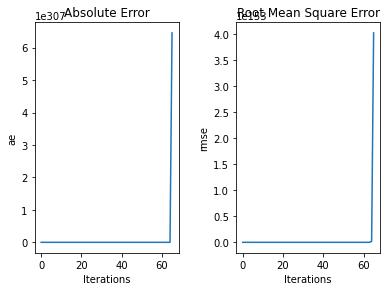

In [26]:
alpha = 0.02
imax = 200
li,lj= gradientDescent(x_train_park,y_train_park,x_test_park,y_test_park,alpha,imax)
fig,(ax1,ax2)= plt.subplots(1,2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
ax1.set_title("Absolute Error")
ax2.set_title("Root Mean Square Error")
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMS")
print("\nSteplength- ",alpha)

We observe from the various graphs that:

1. When steplength is less the error also tends to decrease.
2. imax, the maximum iterations needed to obtain minimum value also depends on the size of the step length taken
3. The lesser steplengths require less number of iterations to reach minimum
4. Higher steplengths may increase error, function diverges

References

https://matplotlib.org/
https://numpy.org/
https://www.kaggle.com/rakend/multiple-linear-regression-with-gradient-descent
https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones
https://pandas.pydata.org/
https://medium.com/analytics-vidhya/implementing-gradient-descent-for-multi-linear-regression-from-scratch-3e31c114ae12